# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline



Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [13]:
# Your code here
df= pd.read_csv("data/ames.csv ")


In [14]:
df = df.set_index("Id")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The following code checks that you loaded the data correctly:

In [15]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [16]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [17]:
# Run this cell without changes
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

Text(0.5, 1.0, 'salePrice FIG')

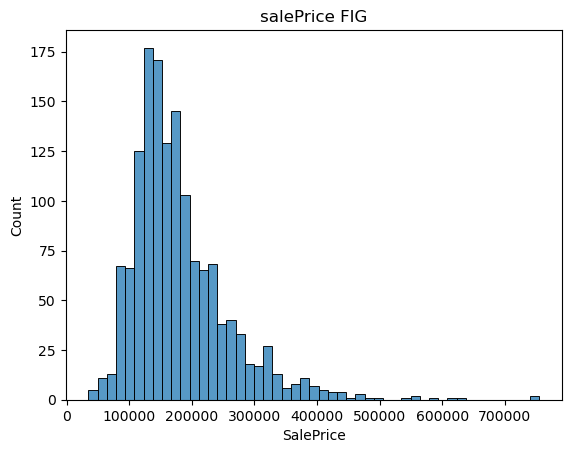

In [18]:
# Your code here

sns.histplot(df['SalePrice'])

plt.title("salePrice FIG")

Investigating the distributionof SalePrice, plotting mean, standard deviation and median through matplotlib (axvline)
mean= df['SalePrice'].mean()

Now, print out the mean, median, and standard deviation:

In [19]:
# Your code here
mean= df['SalePrice'].mean()
mean

180921.19589041095

In [20]:
std= df['SalePrice'].std()
std

79442.50288288663

In [21]:
median= df['SalePrice'].median()
median

163000.0

In the cell below, interpret the above information.

Investigating the distributionof SalePrice, plotting mean, standard deviation and median through matplotlib (axvline)

Text(0, 0.5, 'Count')

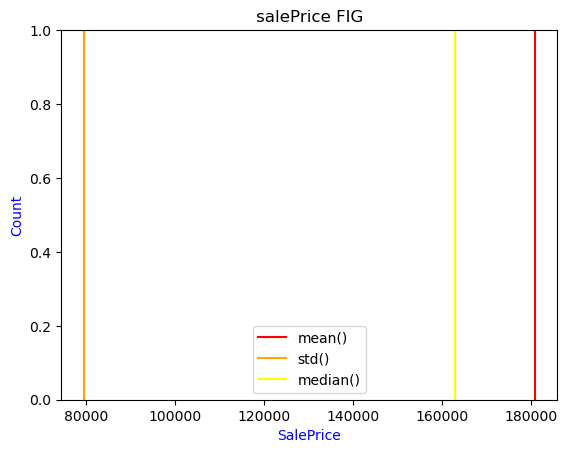

In [22]:
mean= df['SalePrice'].mean()
mean

plt.axvline(mean, color="red", label="mean()")
plt.axvline(std, color="orange", label= 'std()')
plt.axvline(median, color="yellow", label= 'median()')
plt.legend()
plt.title("salePrice FIG")
plt.xlabel("SalePrice", color= 'blue')
plt.ylabel('Count', color= "blue")

SalePrice with mean, median and std 

Text(0, 0.5, 'Count')

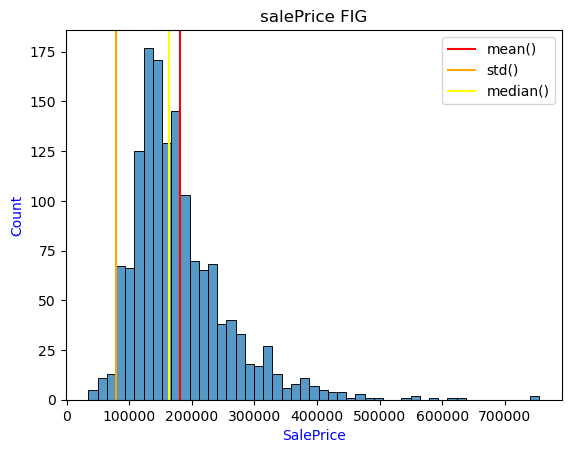

In [23]:
# 

mean= df['SalePrice'].mean()
mean
sns.histplot(df['SalePrice'])
plt.axvline(mean, color="red", label="mean()")
plt.axvline(std, color="orange", label= 'std()')
plt.axvline(median, color="yellow", label= 'median()')
plt.legend()
plt.title("salePrice FIG")
plt.xlabel("SalePrice", color= 'blue')
plt.ylabel('Count', color= "blue")


In [24]:
It is positively skewed.More houses were sold at an average of 1800000-200000 with fewer houses ranging below 180,000. 
There is an outlier of a house that was sold above 700000

SyntaxError: invalid syntax (4133990570.py, line 1)

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

Text(0.5, 1.0, 'TotRmsAbvGrd FIG')

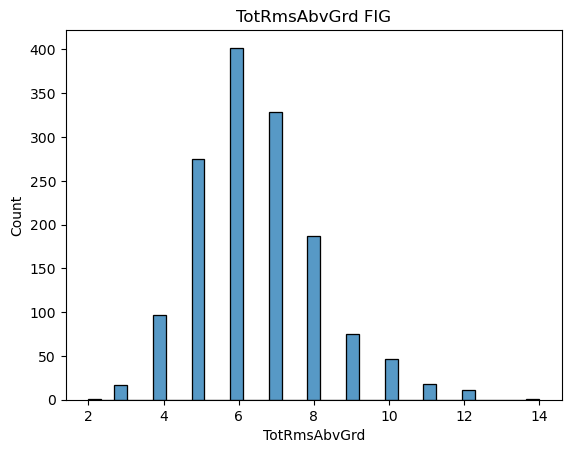

In [25]:
sns.histplot(df['TotRmsAbvGrd'])
plt.title("TotRmsAbvGrd FIG")

In [26]:
# Your code here
mean= df['TotRmsAbvGrd'].mean()
mean




6.517808219178082

In [27]:
std= df['TotRmsAbvGrd'].std()
std

1.625393290584064

In [28]:
median= df['TotRmsAbvGrd'].median()
median

6.0

Now, print out the mean, median, and standard deviation:

In [29]:
# Your code here

In the cell below, interpret the above information.

Text(0, 0.5, 'Count')

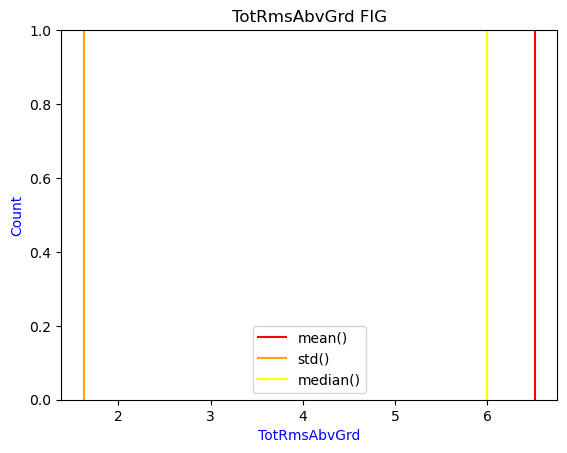

In [30]:
mean= df['TotRmsAbvGrd'].mean()
mean

plt.axvline(mean, color="red", label="mean()")
plt.axvline(std, color="orange", label= 'std()')
plt.axvline(median, color="yellow", label= 'median()')
plt.legend()
plt.title("TotRmsAbvGrd FIG")
plt.xlabel("TotRmsAbvGrd", color= 'blue')
plt.ylabel('Count', color= "blue")

Text(0, 0.5, 'Count')

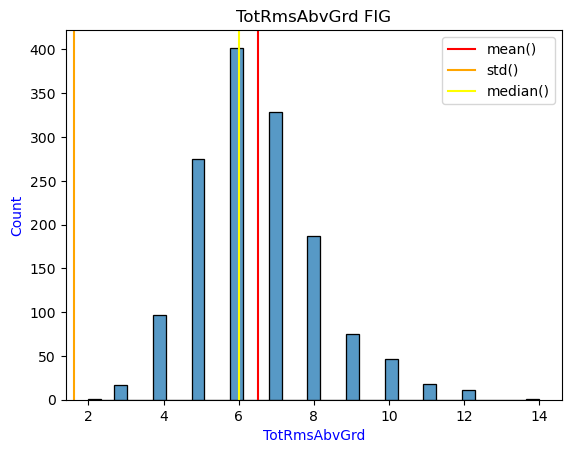

In [31]:
mean= df['TotRmsAbvGrd'].mean()
mean
sns.histplot(df['TotRmsAbvGrd'])
plt.axvline(mean, color="red", label="mean()")
plt.axvline(std, color="orange", label= 'std()')
plt.axvline(median, color="yellow", label= 'median()')
plt.legend()
plt.title("TotRmsAbvGrd FIG")
plt.xlabel("TotRmsAbvGrd", color= 'blue')
plt.ylabel('Count', color= "blue")

In [32]:
The plot shows TotEoomsAbvGrd were centered at 6. It is close to normal distribution.

SyntaxError: invalid syntax (809611713.py, line 1)

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

Text(0.5, 1.0, 'Overall Cond FIG')

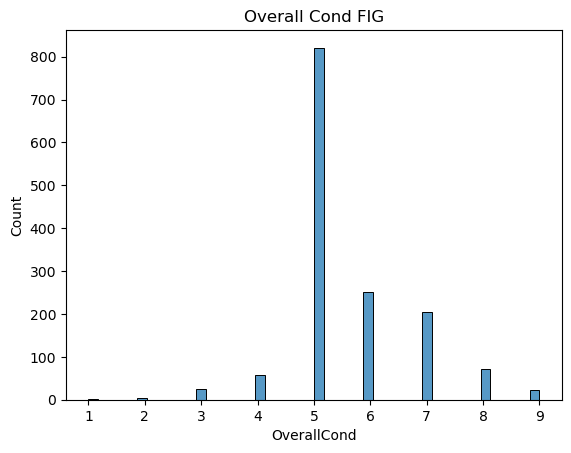

In [33]:
# Your code here

sns.histplot(df['OverallCond'])
plt.title("Overall Cond FIG")

Now, print out the mean, median, and standard deviation:

In [34]:
# Your code here
mean= df['OverallCond'].mean()
mean

5.575342465753424

In [35]:
std= df['OverallCond'].std()
std

1.1127993367127367

In [36]:
median= df['OverallCond'].median()
median

5.0

In the cell below, interpret the above information.

Text(0, 0.5, 'Count')

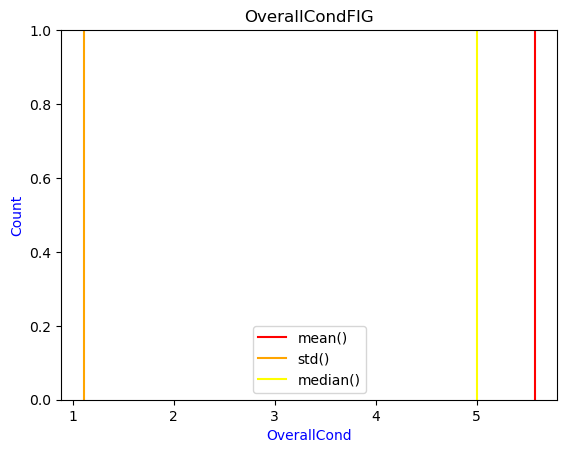

In [37]:
# Replace None with appropriate text
mean= df['OverallCond'].mean()
mean

plt.axvline(mean, color="red", label="mean()")
plt.axvline(std, color="orange", label= 'std()')
plt.axvline(median, color="yellow", label= 'median()')
plt.legend()
plt.title("OverallCondFIG")
plt.xlabel("OverallCond", color= 'blue')
plt.ylabel('Count', color= "blue")


Text(0, 0.5, 'Count')

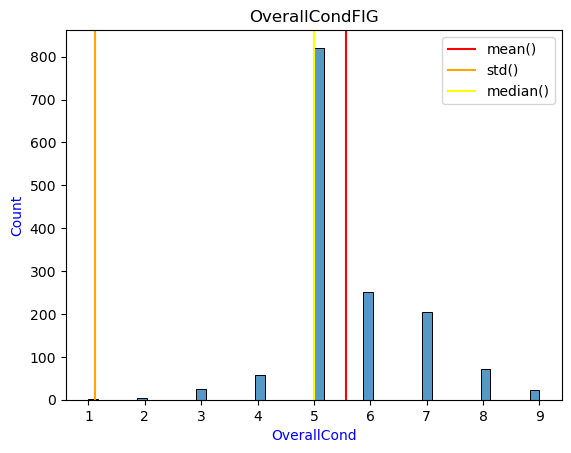

In [38]:
mean= df['OverallCond'].mean()
mean
sns.histplot(df['OverallCond'])
plt.axvline(mean, color="red", label="mean()")
plt.axvline(std, color="orange", label= 'std()')
plt.axvline(median, color="yellow", label= 'median()')
plt.legend()
plt.title("OverallCondFIG")
plt.xlabel("OverallCond", color= 'blue')
plt.ylabel('Count', color= "blue")


In [39]:
The plot is positively skewed. The OverallCond of the house is avarage leaning towards above avarange.

SyntaxError: invalid syntax (1674212793.py, line 1)

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [44]:
below_average_condition =df.loc[(df['OverallCond']<5)]


average_condition = df.loc[(df['OverallCond']==5)]

above_average_condition =df.loc[(df['OverallCond']==5)]


In [41]:
# Replace None with appropriate code
below_average_condition = None
average_condition = None
above_average_condition = None

The following code will produce a plot of the distributions of sale price for each of these subsets:

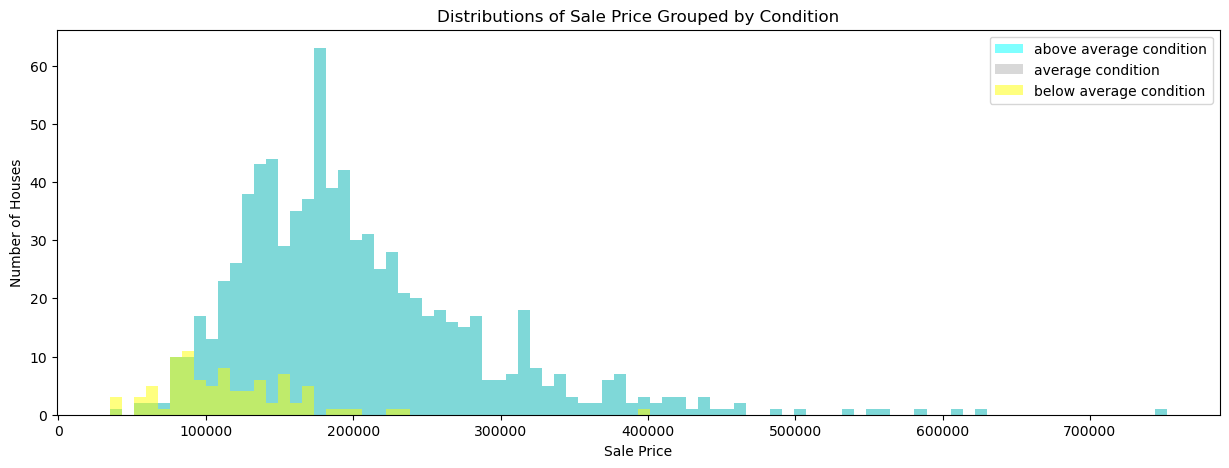

In [45]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [30]:
# Replace None with appropriate text
The OverallCond of the house affected the saleprice. Below_average_cond houses were sold at a lower price.
Above_average house were sold at a higher saleprice. 

'\nNone\n'

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [46]:
numeric_features= df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [47]:
correlation= numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending= False), '\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 



Now, find the ***most negatively correlated*** column:

In [48]:
# Your code here
corr=df['SalePrice'].corr(df['KitchenAbvGr'])
print(corr)

-0.1359073708421411


##### Most positively correlated column.

In [49]:
# Your code here
corr=df['SalePrice'].corr(df['OverallQual'])
print(corr)

0.7909816005838048


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

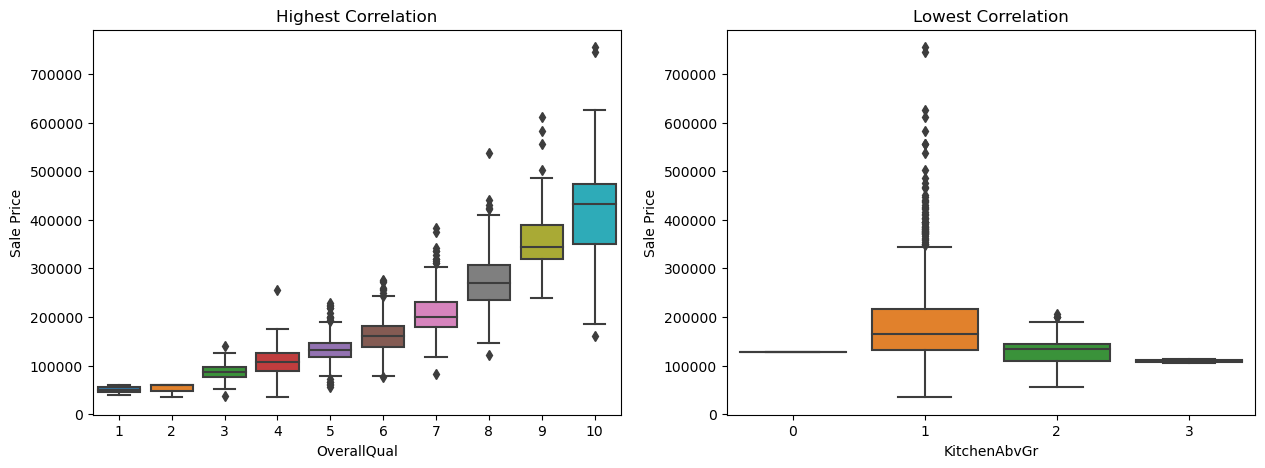

In [50]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df['OverallQual'],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df["KitchenAbvGr"],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title('Highest Correlation')
ax1.set_xlabel('OverallQual')
ax1.set_ylabel("Sale Price")
ax2.set_title('Lowest Correlation')
ax2.set_xlabel('KitchenAbvGr')
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
  OverallQual sumarises all the features of the house thus will have a high correlation with the SalePrice. SalePrice and OverallQuad are positively correlated. an increase of OverallQuad results to an increase in the SalePrice.

KitchenAbvGr is one of the least feature  when buying a house thus having the least correlation with the house.An increase in KitchenAbGrd leads to a decrease in saleprice.

In [51]:
# Replace None with appropriate text
corr=df['SalePrice'].corr(df['OverallQual'])
print(corr)
corr=df['SalePrice'].corr(df['KitchenAbvGr'])
print(corr)

0.7909816005838048
-0.1359073708421411


## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [52]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

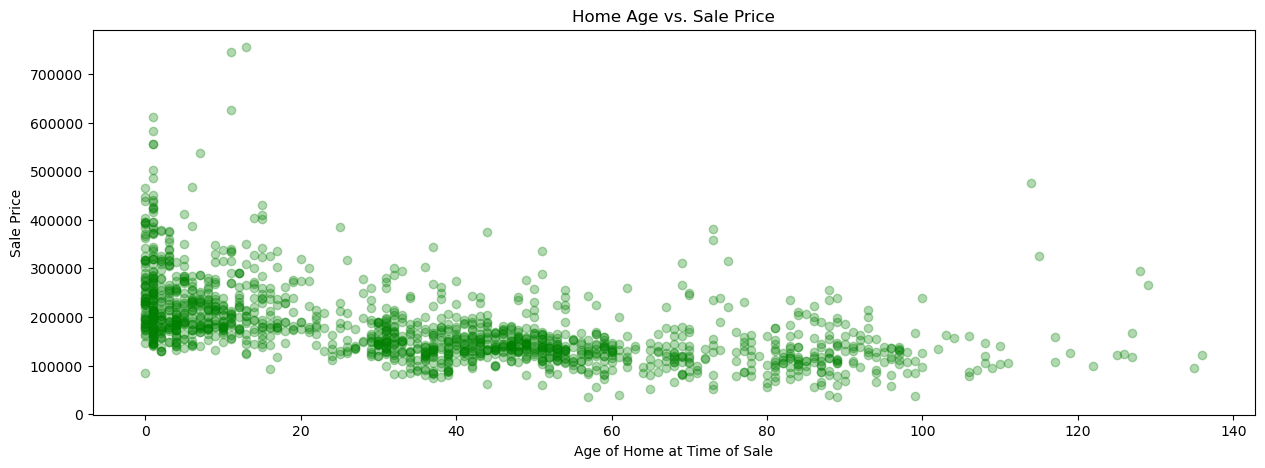

In [53]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [54]:
Analyzing the plot, we see the SalePrice and Age are negatively correlated. 
Age increase leads to a decrease in SalePrice

SyntaxError: invalid syntax (737814498.py, line 1)

We can add a new column = [Age] by finding the diffrence of Yr Sold and Year Built. The values we obtain from the diffrence from row1 will be the new column row1 and it will run for each row to the last row.

In [55]:
df['Age']= df['YrSold'] - df['YearBuilt']
df.Age

Id
1        5
2       31
3        7
4       91
5        8
        ..
1456     8
1457    32
1458    69
1459    60
1460    43
Name: Age, Length: 1460, dtype: int64

In [56]:
corr=df['SalePrice'].corr(df['Age'])
print(corr)

-0.5233504175468161


Analyzing the plot, we see the SalePrice and Age are negatively correlated. 
Age increase leads to a decrease in SalePrice

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.